In [58]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [59]:
Doctor_name = []
Doctor_specialization = []
Doctor_experience = []
Doctor_location = []
Doctor_clinic_name = []
Doctor_hospital = []
Doctor_fee = []

In [60]:
cities = ["Bangalore", "jaipur", "kota"]

In [61]:
for city in cities:
    for i in range(1, 10):
        url = f"https://www.practo.com/{city}/doctors?page={i}"
        r = requests.get(url)
        
        if r.status_code != 200:
            print(f"Failed to retrieve data for {city} page {i}")
            continue
        
        soup = BeautifulSoup(r.text, 'html.parser')
        boxes = soup.find_all('div', class_="info-section")
        
        for box in boxes:
            
            name_div = box.find('div', class_="u-color--primary uv2-spacer--xs-bottom")
            if name_div:
                name_tag = name_div.find('h2', class_="doctor-name")
                if name_tag:
                    Doctor_name.append(name_tag.text.strip())
            
            specialization_tag = box.find('div', class_='u-d-flex').find('span')
            if specialization_tag:
                Doctor_specialization.append(specialization_tag.text.strip())
            
            experience_tag = box.find('div', {'data-qa-id': 'doctor_experience'})
            if experience_tag:
                Doctor_experience.append(experience_tag.text.strip().split()[0])  # Get the number of years
            
            locality_tag = box.find('span', {'data-qa-id': 'practice_locality'})
            city_tag = box.find('span', {'data-qa-id': 'practice_city'})
            if locality_tag and city_tag:
                Doctor_location.append(f"{locality_tag.text.strip()} {city_tag.text.strip()}")
            
            clinic_name_tag = box.find('span', {'data-qa-id': 'doctor_clinic_name'})
            if clinic_name_tag:
                Doctor_clinic_name.append(clinic_name_tag.text.strip())
            
            consultation_fee_tag = box.find('span', {'data-qa-id': 'consultation_fee'})
            if consultation_fee_tag:
                Doctor_fee.append(consultation_fee_tag.text.strip())

Failed to retrieve data for jaipur page 7
Failed to retrieve data for jaipur page 8
Failed to retrieve data for kota page 3
Failed to retrieve data for kota page 6
Failed to retrieve data for kota page 7


In [62]:
data = {
    "Doctor_name" : Doctor_name,
    "Doctor_specialization" : Doctor_specialization,
    "Doctor_experience" : Doctor_experience,
    "Doctor_location" : Doctor_location,
    "Doctor_clinic_name" : Doctor_clinic_name,
    "Doctor_fee" : Doctor_fee
}

In [63]:
df = pd.DataFrame(data)
df.head()

,Doctor_name,Doctor_specialization,Doctor_experience,Doctor_location,Doctor_clinic_name,Doctor_fee
0,Dr. Vivekananda Reddy,Dentist,24,"Hoodi, Bangalore",Smile Craft Dental and Implant Centre,₹500
1,Dr. Sumanth Shetty,Dentist,26,"Koramangala, Bangalore",Chisel Dental,₹300
2,Dr. Venkatesh M J,Dentist,30,"Indiranagar, Bangalore",All Care Dental Centre - since 1969,₹300
3,Dr. Parthasarathi Dutta Roy,Dermatologist,22,"Magrath Road, Bangalore",Dr. Partha Sarathi's Asian Hair And Skin Hospi...,₹800
4,Dr. K.A. Mohan,Dentist,56,"Domlur, Bangalore",Dental De Care,₹500


In [64]:
df.shape

(220, 6)

In [65]:
df = df.drop(columns = ["Doctor_name", "Doctor_clinic_name"])
df.head()

,Doctor_specialization,Doctor_experience,Doctor_location,Doctor_fee
0,Dentist,24,"Hoodi, Bangalore",₹500
1,Dentist,26,"Koramangala, Bangalore",₹300
2,Dentist,30,"Indiranagar, Bangalore",₹300
3,Dermatologist,22,"Magrath Road, Bangalore",₹800
4,Dentist,56,"Domlur, Bangalore",₹500


In [66]:
df.dtypes

Doctor_specialization    object
Doctor_experience        object
Doctor_location          object
Doctor_fee               object
dtype: object

In [67]:
df["Doctor_experience"] = df["Doctor_experience"].astype('int')

In [68]:
df["Doctor_location"] =  df["Doctor_location"].apply(lambda x: x.split(",")[-1].strip())

In [69]:
df["Doctor_fee"] = df["Doctor_fee"].str.replace('₹','')

In [70]:
df["Doctor_fee"] = df["Doctor_fee"].str.replace('Free Consultation','0')

In [111]:
df["Doctor_fee"] = df["Doctor_fee"].astype(int)

In [71]:
df.head()

,Doctor_specialization,Doctor_experience,Doctor_location,Doctor_fee
0,Dentist,24,Bangalore,500
1,Dentist,26,Bangalore,300
2,Dentist,30,Bangalore,300
3,Dermatologist,22,Bangalore,800
4,Dentist,56,Bangalore,500


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

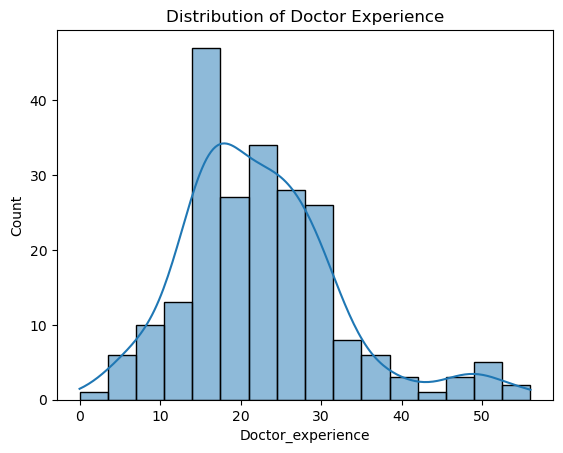

In [73]:
sns.histplot(df['Doctor_experience'], kde=True)
plt.title("Distribution of Doctor Experience")
plt.show()

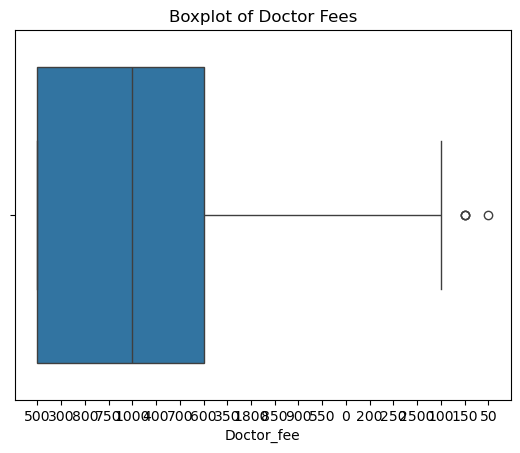

In [74]:
sns.boxplot(x=df['Doctor_fee'])
plt.title("Boxplot of Doctor Fees")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7856\1747344350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Doctor_specialization', palette='viridis')


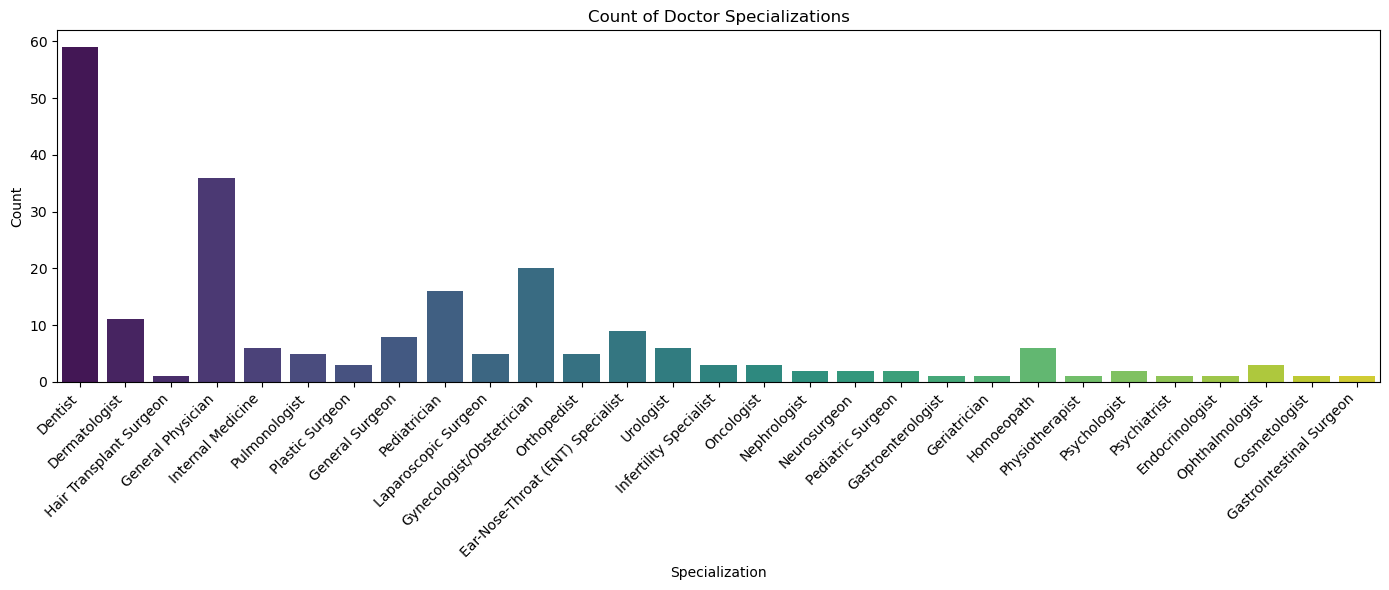

In [75]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Doctor_specialization', palette='viridis')
plt.title('Count of Doctor Specializations')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7856\3764279030.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Doctor_experience', palette='viridis')


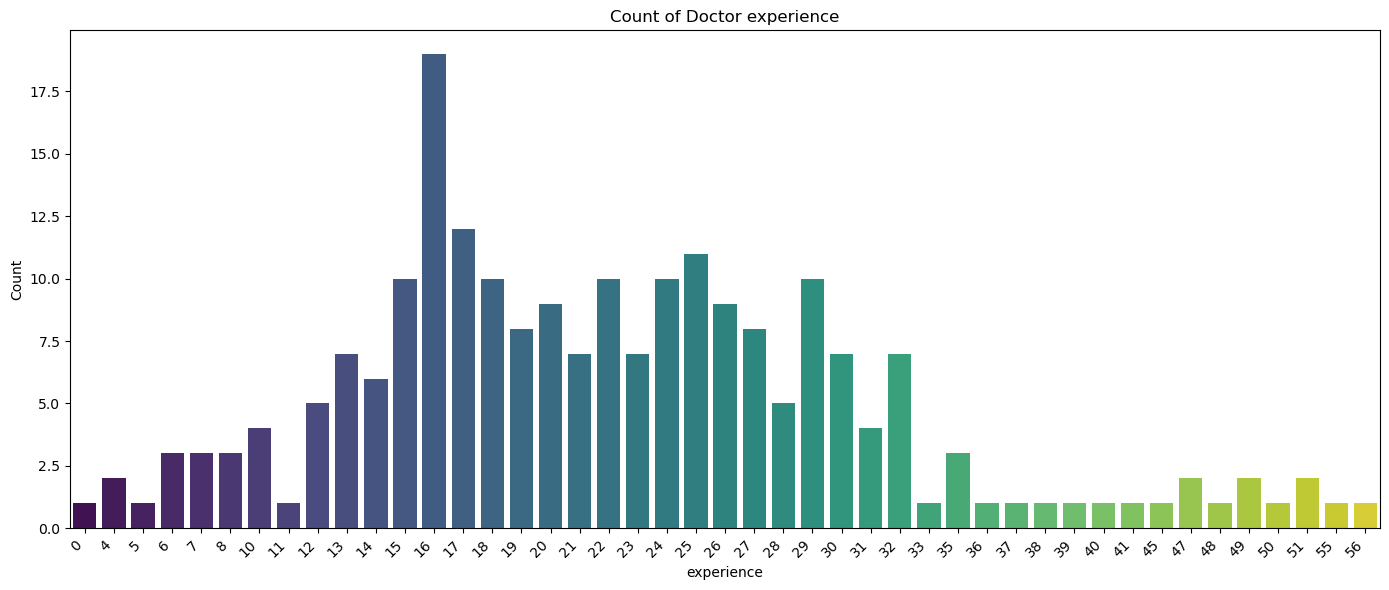

In [76]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Doctor_experience', palette='viridis')
plt.title('Count of Doctor experience')
plt.xlabel('experience')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7856\1580446137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Doctor_location', palette='viridis')


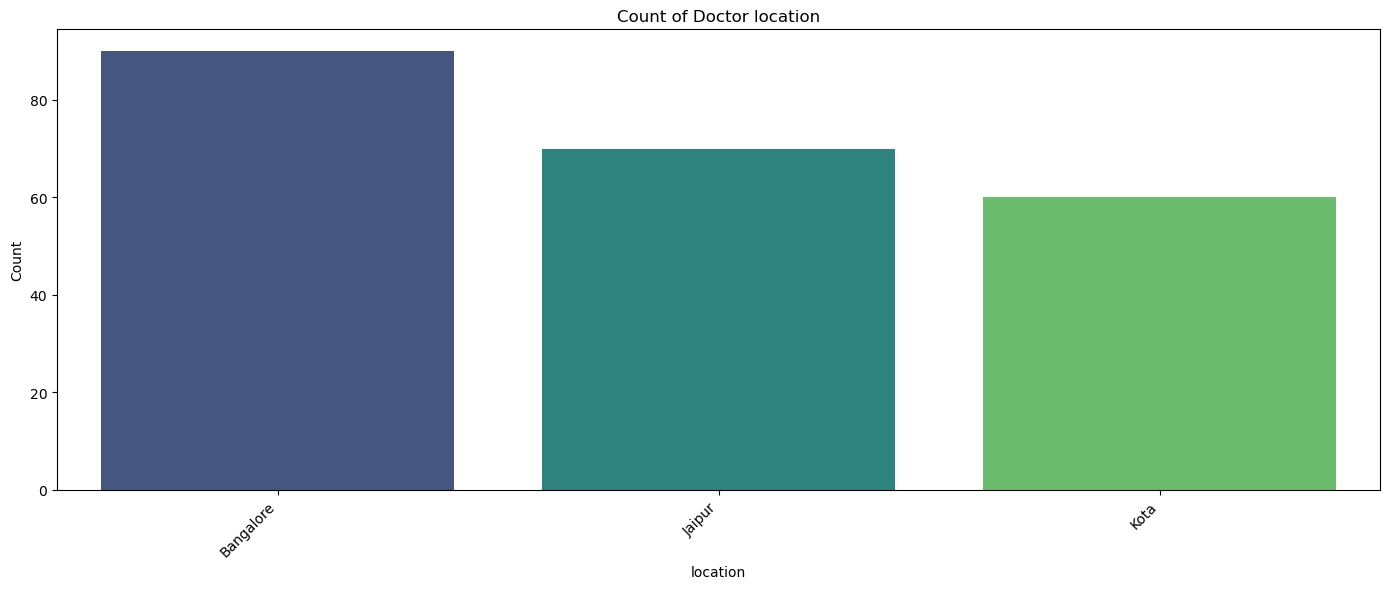

In [77]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Doctor_location', palette='viridis')
plt.title('Count of Doctor location')
plt.xlabel('location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
lb = LabelEncoder()

In [80]:
df['Doctor_specialization']=lb.fit_transform(df['Doctor_specialization'])

In [81]:
df['Doctor_location']=lb.fit_transform(df['Doctor_location'])


In [82]:
df.head()

,Doctor_specialization,Doctor_experience,Doctor_location,Doctor_fee
0,1,24,0,500
1,1,26,0,300
2,1,30,0,300
3,2,22,0,800
4,1,56,0,500


In [83]:
df['Doctor_fee'].value_counts()

Doctor_fee
500     59
400     34
300     27
200     22
800     14
1000    14
600     10
700      9
100      9
350      4
750      3
150      3
250      3
550      2
0        2
2500     1
850      1
900      1
1800     1
50       1
Name: count, dtype: int64

In [113]:
df.dtypes

Doctor_specialization    int32
Doctor_experience        int32
Doctor_location          int32
Doctor_fee               int32
dtype: object

In [115]:
x=df.drop(columns=['Doctor_fee'])
y=df['Doctor_fee']

In [117]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [121]:
from sklearn.linear_model import LogisticRegression

In [123]:
lr = LogisticRegression()

In [125]:
lr.fit(x_train , y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
y_pred = lr.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(y_test,y_pred)

0.45454545454545453

In [133]:
param_grid = [
    {'penalty':['l1','l2','elasticnet','none'],
    'C' : np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter'  : [100,1000,2500,5000]
}
]

In [135]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(lr,param_grid = param_grid, cv = 3,
                   verbose=True,n_jobs=-1)
clf

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [ ]:
best_clf = clf.fit(x_train,y_train)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [ ]:
print(f'Accuracy - : {best_clf.score(x_train,y_train):.3f}')